In [84]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

C:\Users\jose.bieco\AppData\Local\Temp\ipykernel_14072\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Dados não completos

In [2]:
# Carregar o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('./dados.csv', delimiter=';')

In [4]:
# Converter a coluna de datas para o tipo datetime
df['Data de abertura'] = pd.to_datetime(df['Data de abertura'])

# Criar uma nova coluna contendo apenas a data (sem a informação de hora)
df['data'] = df['Data de abertura'].dt.date

# Contar a quantidade de chamados abertos por data
contagem_por_data = df.groupby('data').size().reset_index(name='quantidade de chamados')

In [5]:

contagem_por_data

,data,quantidade de chamados
0,2023-08-16,15
1,2023-08-17,10
2,2023-08-18,3
3,2023-08-20,1
4,2023-08-21,4
...,...,...
101,2024-02-06,4
102,2024-02-07,14
103,2024-02-08,11
104,2024-02-09,4


In [22]:
# Salvar o resultado em um novo arquivo CSV
contagem_por_data.to_csv('contagem_de_chamados_por_data.csv', index=True)

In [6]:
import matplotlib.pylab as plt

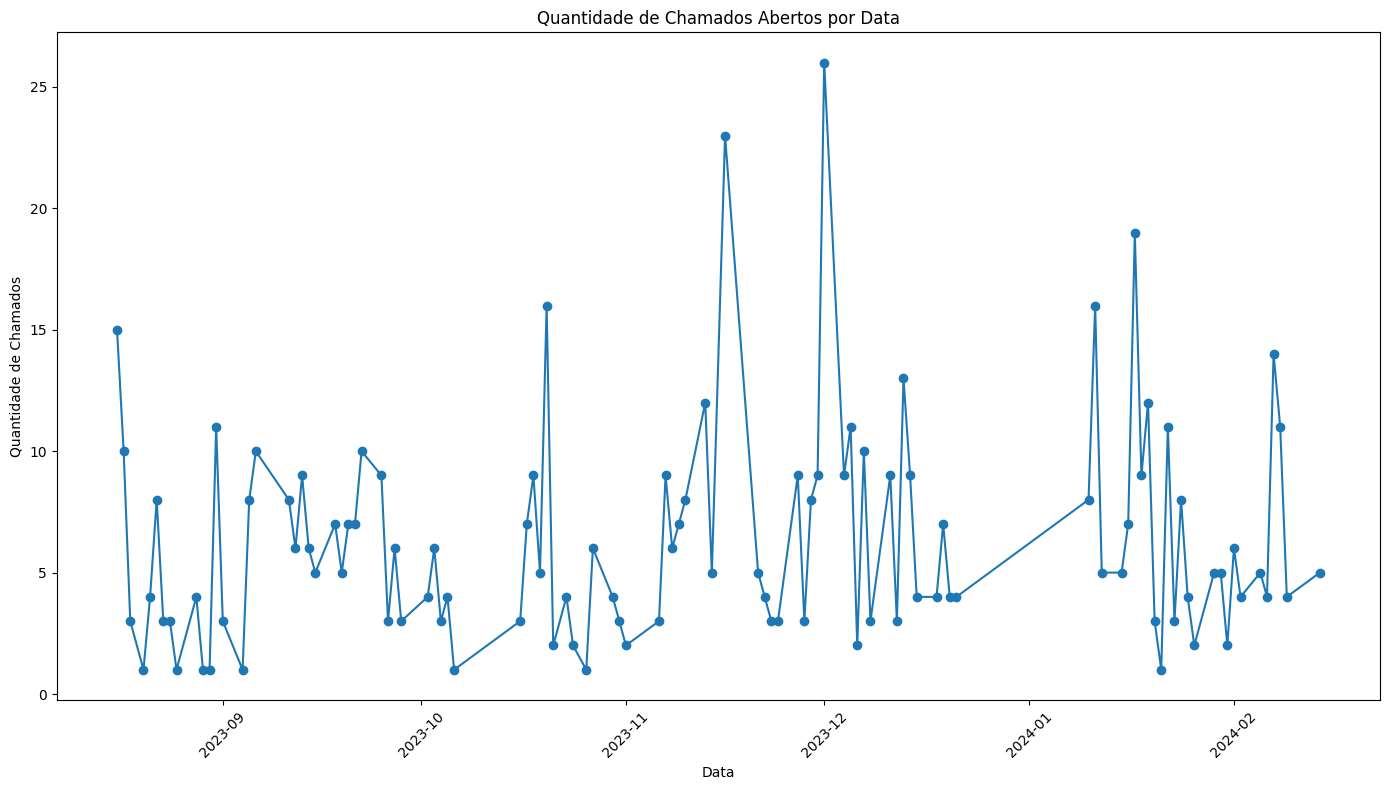

In [7]:
# Plotar o gráfico de linha
plt.figure(figsize=(14, 8))
plt.plot(contagem_por_data['data'], contagem_por_data['quantidade de chamados'], marker='o', linestyle='-')
plt.title('Quantidade de Chamados Abertos por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Converter a coluna de datas para o tipo datetime
df['Data de abertura'] = pd.to_datetime(df['Data de abertura'])

# Filtrar os dados do ano de 2024
dados_2024 = df[df['Data de abertura'].dt.year == 2024]

# Contar a quantidade de chamados abertos por data em 2024
contagem_por_data_2024 = dados_2024.groupby('Data de abertura').size().reset_index(name='quantidade de chamados')

contagem_por_data_2024

,Data de abertura,quantidade de chamados
0,2024-01-10,8
1,2024-01-11,16
2,2024-01-12,5
3,2024-01-15,5
4,2024-01-16,7
5,2024-01-17,19
6,2024-01-18,9
7,2024-01-19,12
8,2024-01-20,3
9,2024-01-21,1


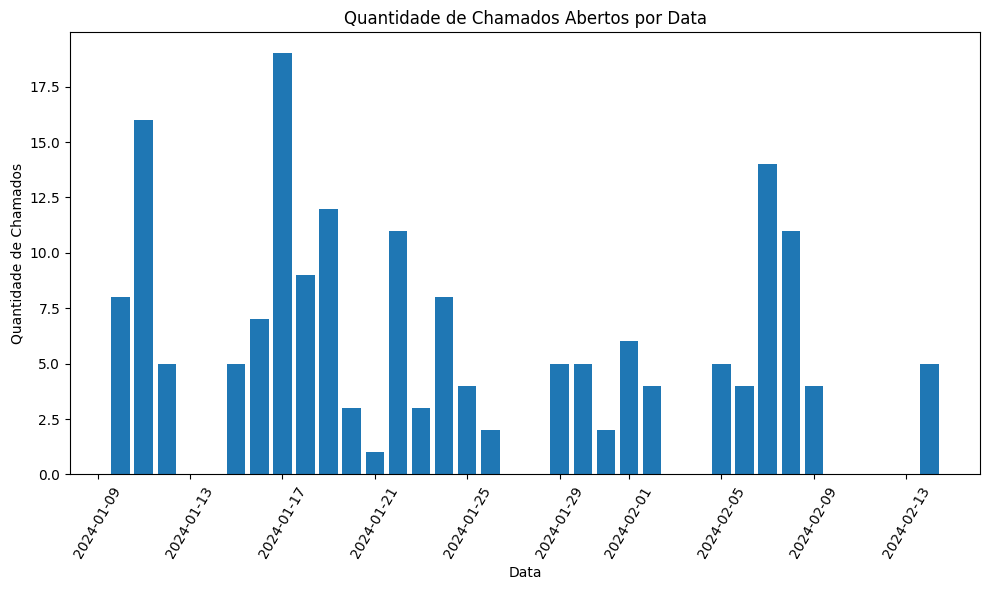

In [10]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_data_2024['Data de abertura'], contagem_por_data_2024['quantidade de chamados'])
plt.title('Quantidade de Chamados Abertos por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [92]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [12]:
# Agregar os dados por data e calcular a quantidade de chamados abertos por dia
contagem_por_data = df.groupby('Data de abertura').size().reset_index(name='quantidade de chamados')

# Definir a série temporal (quantidade de chamados abertos por dia) como índice do DataFrame
contagem_por_data.set_index('Data de abertura', inplace=True)

In [157]:
len(contagem_por_data)

106

In [13]:
# Dividir os dados em conjuntos de treinamento e teste
train_data = contagem_por_data.iloc[:-7]  # Usando todos os dias, exceto os últimos 7, como dados de treinamento
test_data = contagem_por_data.iloc[-7:]  # Os últimos 7 dias como dados de teste


In [111]:
# Ajustar o modelo ARIMA aos dados de treinamento
model = ARIMA(train_data, order=(7,1,0))  # Aqui, (5,1,0) são os parâmetros do modelo ARIMA (p, d, q)
fitted_model = model.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [109]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             quantidade   No. Observations:                  128
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -375.000
Date:                Thu, 15 Feb 2024   AIC                            766.000
Time:                        11:14:22   BIC                            788.753
Sample:                    08-16-2023   HQIC                           775.244
                         - 12-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7453      0.076     -9.824      0.000      -0.894      -0.597
ar.L2         -0.6914      0.104     -6.651      0.000      -0.895      -0.488
ar.L3         -0.5399      0.114     -4.731      0.0

In [16]:
def model_predict(steps=7, model=None):
    return np.round(model.forecast(steps))

In [17]:
# Fazer previsões para os próximos 7 dias
# forecast = fitted_model.forecast(steps=7)
# forecast = np.round(forecast)
forecast = model_predict(steps=7, model=fitted_model)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:
# Exibir as previsões
print("Previsões para os próximos 7 dias:")
print(forecast)

Previsões para os próximos 7 dias:
99     4.0
100    6.0
101    4.0
102    4.0
103    4.0
104    5.0
105    4.0
Name: predicted_mean, dtype: float64


Previsões para os próximos 7 dias (valores inteiros):
            Quantidade de Chamados
2024-02-15                     4.0
2024-02-16                     6.0
2024-02-17                     4.0
2024-02-18                     4.0
2024-02-19                     4.0
2024-02-20                     5.0
2024-02-21                     4.0


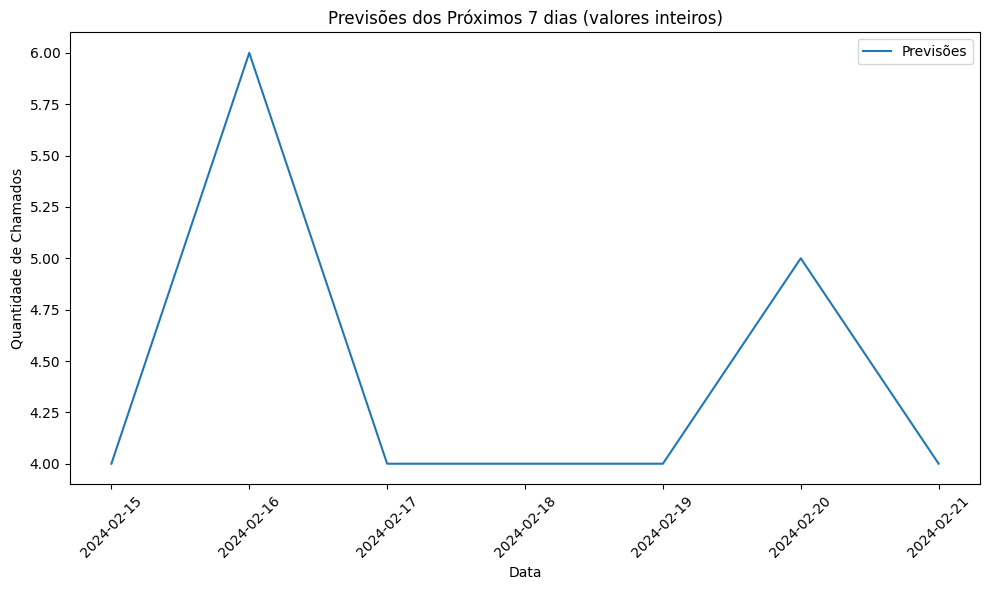

In [19]:
# Calcular a data inicial para as previsões (amanhã)
data_inicial = contagem_por_data.index[-1] + pd.Timedelta(days=1)

# Criar o índice das datas para as previsões
index_previsao = pd.date_range(start=data_inicial, periods=7)

# Exibir as previsões
print("Previsões para os próximos 7 dias (valores inteiros):")
print(pd.DataFrame(forecast.values, index=index_previsao, columns=['Quantidade de Chamados']))

# Plotar os dados originais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(index_previsao, forecast, label='Previsões')
plt.title('Previsões dos Próximos 7 dias (valores inteiros)')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [177]:
print(model_predict(1, fitted_model))

99    4.0
dtype: float64


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [121]:
# Carregar o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('dados.csv', delimiter=';')

# Converter a coluna de datas para o tipo datetime
df['Data de abertura'] = pd.to_datetime(df['Data de abertura'], dayfirst=True)

# Agregar os dados por data e calcular a quantidade de chamados abertos por dia
contagem_por_data = df.groupby('Data de abertura').size().reset_index(name='quantidade de chamados')

# Definir a série temporal (quantidade de chamados abertos por dia) como índice do DataFrame
contagem_por_data.set_index('Data de abertura', inplace=True)
contagem_por_data.index = pd.DatetimeIndex(contagem_por_data.index, dayfirst=True)

# Dividir os dados em conjunto de treinamento e teste
num_treino = 90  # usar 90 dias para treinamento
treino = contagem_por_data.iloc[:num_treino]
teste = contagem_por_data.iloc[num_treino:]


In [140]:
# Ajustar o modelo ARIMA aos dados de treinamento
modelo_arima = ARIMA(treino, order=(5,2,2))  # Aqui, (5,1,0) são os parâmetros do modelo ARIMA (p, d, q)
modelo_arima_ajustado = modelo_arima.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python312\Lib\site-packages\statsmodels\base\model.p

In [141]:

# Fazer previsões para os próximos dias usando o modelo ajustado
previsoes = modelo_arima_ajustado.forecast(steps=len(teste))

# Arredondar as previsões para o inteiro mais próximo
previsoes = np.round(previsoes)

# Exibir as previsões
print("Previsões para os próximos 7 dias (valores inteiros):")
print(pd.DataFrame(previsoes.values[::-1], teste.index))


Previsões para os próximos 7 dias (valores inteiros):
                    0
Data de abertura     
2024-01-22        4.0
2024-01-23        5.0
2024-01-24        4.0
2024-01-25        5.0
2024-01-26        4.0
2024-01-29        5.0
2024-01-30        4.0
2024-01-31        5.0
2024-02-01        4.0
2024-02-02        6.0
2024-02-05        4.0
2024-02-06        5.0
2024-02-07        3.0
2024-02-08        6.0
2024-02-09        6.0
2024-02-14        6.0


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


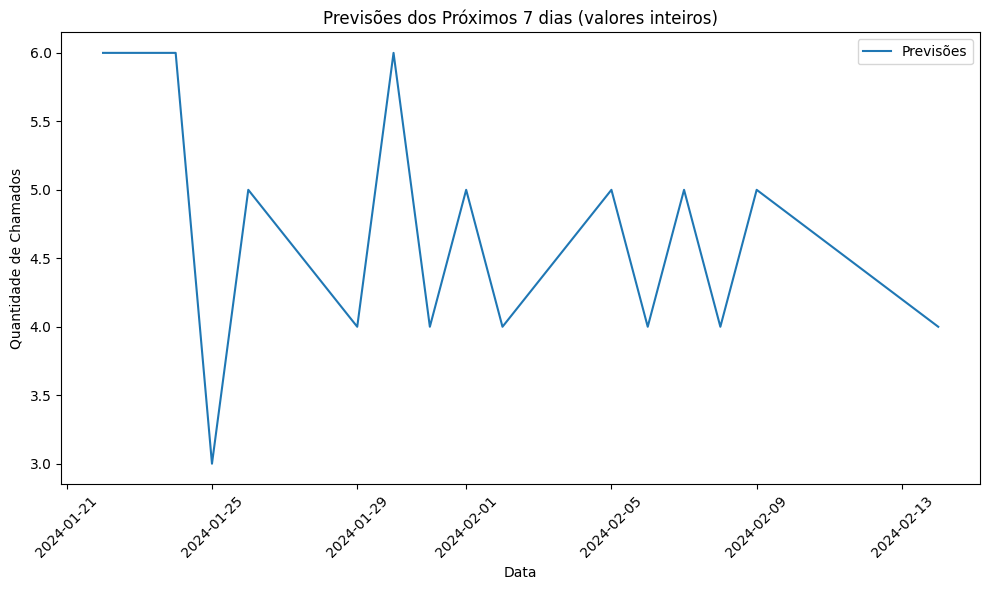

In [142]:
# Plotar os dados de treinamento, teste e previsões
plt.figure(figsize=(10, 6))
plt.plot(teste.index, previsoes.values, label='Previsões')
plt.title('Previsões dos Próximos 7 dias (valores inteiros)')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [155]:
modelo_arima_ajustado.predict(15)

Data de abertura
2023-09-05    -0.217626
2023-09-06     5.652799
2023-09-11     7.431312
2023-09-12     5.636027
2023-09-13     6.297426
                ...    
2024-01-17     8.727354
2024-01-18    12.215813
2024-01-19     9.902036
2024-01-20     9.459728
2024-01-21     9.758717
Name: predicted_mean, Length: 75, dtype: float64

## Modelo ARIMA

In [113]:
df = pd.read_csv('./dados_chamados.csv', sep=';')

In [24]:
df

,data_de_abertura,quantidade
0,16/08/2023,15
1,17/08/2023,10
2,18/08/2023,3
3,19/08/2023,0
4,20/08/2023,1
...,...,...
178,10/02/2024,0
179,11/02/2024,0
180,12/02/2024,0
181,13/02/2024,0


In [114]:
# Converter a coluna de datas para o tipo datetime
df['data_de_abertura'] = pd.to_datetime(df['data_de_abertura'], dayfirst=True)

In [80]:
df

,data_de_abertura,quantidade
0,2023-08-16,15
1,2023-08-17,10
2,2023-08-18,3
3,2023-08-19,0
4,2023-08-20,1
...,...,...
178,2024-02-10,0
179,2024-02-11,0
180,2024-02-12,0
181,2024-02-13,0


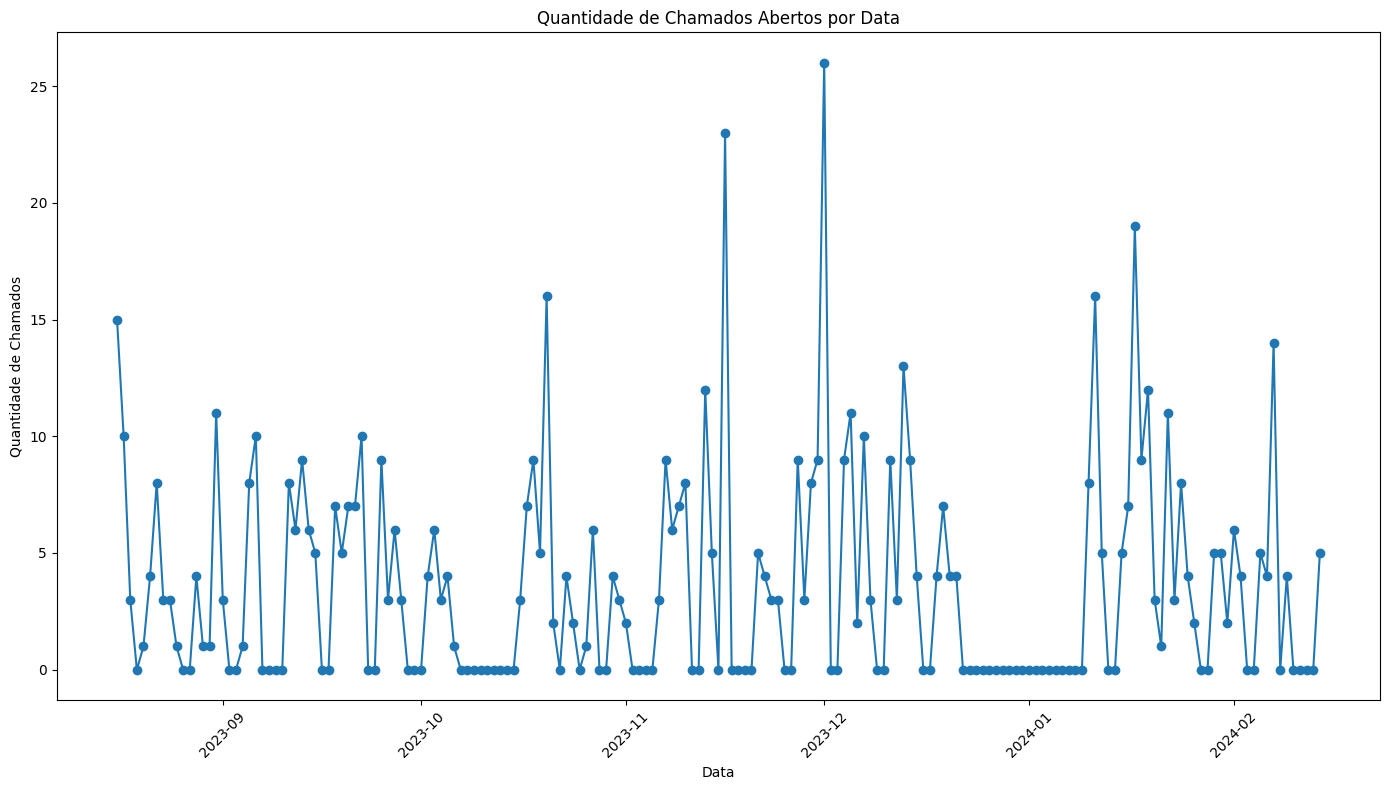

In [115]:
# Plotar o gráfico de linha
plt.figure(figsize=(14, 8))
plt.plot(df['data_de_abertura'], df['quantidade'], marker='o', linestyle='-')
plt.title('Quantidade de Chamados Abertos por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
import math

In [116]:
# Definir função para separar os dados em treino e teste
def train_test_splitter(dataset, train=0.7):
    dataset_size = dataset.shape[0]

    qtd_train = math.floor(dataset_size * train)

    dataset_train = dataset.iloc[:qtd_train]
    dataset_test = dataset.iloc[qtd_train:]

    return [dataset_train, dataset_test]



In [117]:
# Carregando as bases de treino e teste
dataset_train, dataset_test = train_test_splitter(dataset=df, train=0.7)

In [118]:
# Definir a coluna de data como índice
df.set_index('data_de_abertura', inplace=True)

# Especificar a frequência como diária
df.index.freq = 'D'

In [119]:
df

,quantidade
data_de_abertura,
2023-08-16,15
2023-08-17,10
2023-08-18,3
2023-08-19,0
2023-08-20,1
...,...
2024-02-10,0
2024-02-11,0
2024-02-12,0


In [120]:
# Ajustar o modelo ARIMA aos dados de treinamento
model = ARIMA(df, order=(7,1,0))  # Aqui, (5,1,0) são os parâmetros do modelo ARIMA (p, d, q)
fitted_model = model.fit()

In [121]:
# Função para realizar a predição e arredondamento
def model_predict(steps=7, model=None):
    return np.round(model.forecast(steps))

In [122]:
# Fazer previsões para os próximos 7 dias
forecast = model_predict(steps=7, model=fitted_model)

In [123]:
# Exibir as previsões
print("Previsões para os próximos 7 dias:")
print(forecast)

Previsões para os próximos 7 dias:
2024-02-15    3.0
2024-02-16    2.0
2024-02-17    2.0
2024-02-18    1.0
2024-02-19    1.0
2024-02-20    2.0
2024-02-21    3.0
Freq: D, Name: predicted_mean, dtype: float64


In [124]:
# Calcular a data inicial para as previsões (amanhã)
data_inicial = contagem_por_data.index[-1] + pd.Timedelta(days=1)

# Criar o índice das datas para as previsões
index_previsao = pd.date_range(start=data_inicial, periods=7)

# Exibir as previsões
print("Previsões para os próximos 7 dias (valores inteiros):")
print(pd.DataFrame(forecast.values, index=index_previsao, columns=['Quantidade de Chamados']))

Previsões para os próximos 7 dias (valores inteiros):
            Quantidade de Chamados
2024-02-15                     3.0
2024-02-16                     2.0
2024-02-17                     2.0
2024-02-18                     1.0
2024-02-19                     1.0
2024-02-20                     2.0
2024-02-21                     3.0


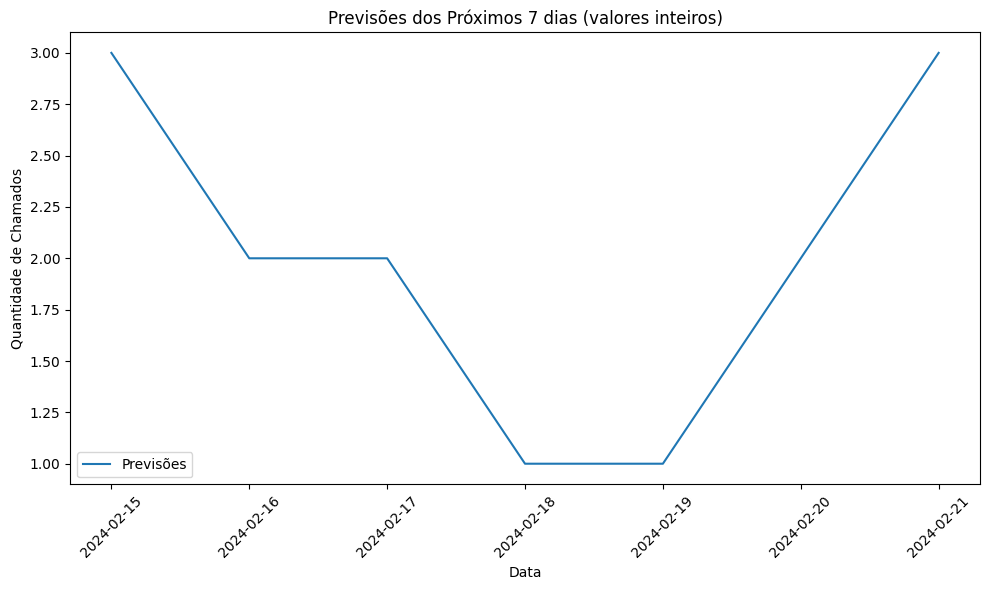

In [125]:
# Plotar os dados originais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(index_previsao, forecast, label='Previsões')
plt.title('Previsões dos Próximos 7 dias (valores inteiros)')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Modelo SARIMA

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [141]:
# Ajustar o modelo SARIMA aos dados
modelo = SARIMAX(df['quantidade'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 7))
resultado = modelo.fit()

In [142]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          quantidade   No. Observations:                  183
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 7)   Log Likelihood                -504.815
Date:                             Thu, 15 Feb 2024   AIC                           1025.630
Time:                                     11:33:36   BIC                           1050.949
Sample:                                 08-16-2023   HQIC                          1035.900
                                      - 02-14-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7844      0.075    -10.454      0.000      -0.931      -0.637
ar.L2         -0.5987      0.101     -5.913      0.000      -0.797      -0.400
ar.L3         -0.3709      0.119     -3.119      0.002      -0.604      -0.138
ar.L4         -0.2629      0.108     -2.436      0.015      -0.474      -0.051
ar.L5         -0.1858      0.084     -2.199      0.028      -0.351      -0.020
ar.S.L7       -0.0695      0.102     -0.683      0.494      -0.269       0.130
ma.S.L7       -0.9998     29.572     -0.034      0.973     -58.960      56.960
sigma2        16.2609    479.917      0.034      0.973    -924.358     956.880
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               211.77
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             1.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
# Fazer a previsão para os próximos períodos desejados
# Por exemplo, para prever os próximos 7 dias
previsao = resultado.predict(start=len(df), end=len(df)+6)

# Arredondar os valores de previsão
previsao_arredondada = previsao.round()

# Definir qualquer valor negativo para zero
previsao_arredondada[previsao_arredondada < 0] = 0

print("Previsão de chamados para os próximos 7 dias:")
print(previsao_arredondada)

Previsão de chamados para os próximos 7 dias:
2024-02-15    4.0
2024-02-16    2.0
2024-02-17    0.0
2024-02-18    0.0
2024-02-19    2.0
2024-02-20    3.0
2024-02-21    4.0
Freq: D, Name: predicted_mean, dtype: float64


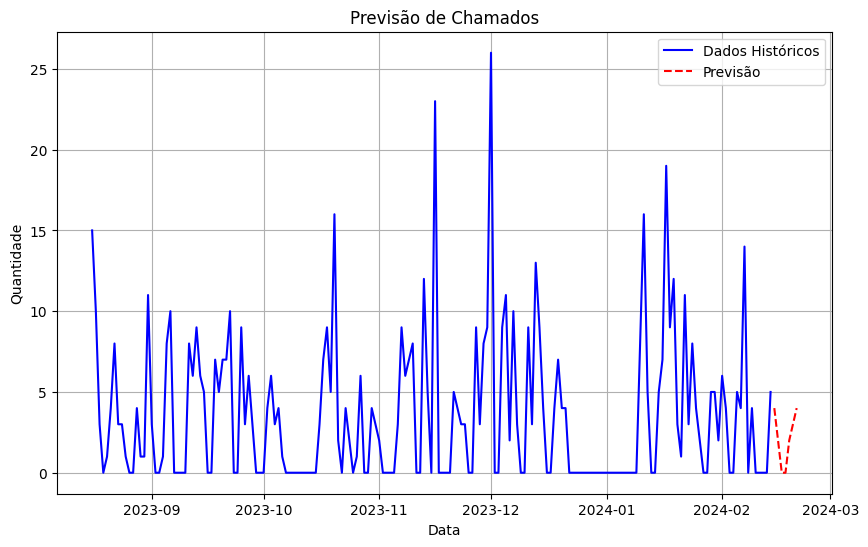

In [144]:
# Plotar os dados históricos e as previsões
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['quantidade'], label='Dados Históricos', color='blue')
plt.plot(previsao_arredondada.index, previsao_arredondada, label='Previsão', color='red', linestyle='--')
plt.title('Previsão de Chamados')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
#Apenas a previsão
plt.figure(figsize=(10, 6))
plt.plot(previsao_arredondada.index, previsao_arredondada, label='Previsão', color='red', marker='o', linestyle='--')
plt.title('Previsões dos Próximos 7 dias')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined